# Scenario 1:Analyzing Rooming House Enforcement Activity

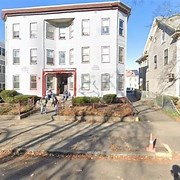

Welcome to your new role as a data analyst for the City of Winnipeg! You’ve been assigned an intriguing project that involves diving into the city's enforcement activities related to illegal rooming houses. Your goal is to uncover patterns and insights from this data, which will help the city enhance its enforcement strategies.

One fine morning, your supervisor hands you a dataset containing records of enforcement activities for the year 2024. As you glance through the data, you notice it has various columns:

Year: The year of the enforcement activity.
    
Ward: The ward where the enforcement activity took place.
    
Neighbourhood: The neighborhood where the enforcement activity took place.
    
Complaint Driven: Number of incidents driven by complaints.
    
Proactive Enforcement: Number of incidents identified through proactive enforcement.
    
In Progress - Investigation: Number of investigations that are currently in progress.
    
Completed - Investigation: Number of investigations that have been completed.

# Step 1:Loading Data from API:

In [5]:
import pandas as pd
from sodapy import Socrata

client = Socrata("data.winnipeg.ca", "0U1asei1djEgi1PT7txPphyoF")

Rooming_House = client.get("vk2f-xwp7")

# Correcting the method name
df = pd.DataFrame.from_records(Rooming_House)


# Step 2:Inspect the Data:

In [7]:
# Check the structure of the DataFrame 
#Hint:info()
print(f'INFO: {df.info()}')

# Display summary statistics for numerical columns
#Hint:describe()
print(f'DESCRIBE: {df.describe()}')


# the name of columns
print(f'COLUMNS: {df.columns}')

#the number of rows and columns
print(f'SHAPE: {df.shape}')

#Discover dataset by .head()
print(f'HEAD: {df.head()}')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   405 non-null    object
 1   ward                   405 non-null    object
 2   neighbourhood          405 non-null    object
 3   complaint_driven       405 non-null    object
 4   proactive_enforcement  405 non-null    object
 5   in_progress            405 non-null    object
 6   completed              405 non-null    object
dtypes: object(7)
memory usage: 22.3+ KB
INFO: None
DESCRIBE:                            year           ward  neighbourhood  \
count                       405            405            405   
unique                        9             15            132   
top     2018-01-01T00:00:00.000  Waverley West  Richmond West   
freq                         72             65              9   

       complaint_driven proactive_enforcement in_

# Step 3: Extracting Yearly Data:

In [9]:
# Extract year from the timestamp by year column
df['year'] = pd.to_datetime(df['year']).dt.year

# Group by year and sum the incidents
yearly_data = df.groupby('year')[['complaint_driven', 'proactive_enforcement']].sum()

# Display the yearly data
print(yearly_data)


                                       complaint_driven  \
year                                                      
2017             02013111012040111011120256231013331223   
2018  2104013010000211010111133011020100010000100010...   
2019  1011312021000003233110111202023110000000021920...   
2020  1100111131121021111111010111001204012100111221414   
2021   111101300211112026231511141011111101112212156267   
2022                 1351111111112811231111211421112431   
2023          10111101111111316332121218111111012210232   
2024  3601202011111111211421221132241211111117111111...   
2025                                             111311   

                                  proactive_enforcement  
year                                                     
2017              1021000010111100011000206200102100312  
2018  0015106321121001121005048302411711303121011101...  
2019  0130320220212110115011000030306001221212114961...  
2020  0012001001010300000000101000112811101011001002105  
20

# Step 4: Ward Analysis

In [11]:
# Group by ward and sum the incidents
ward_data = df.groupby('ward')[['complaint_driven', 'proactive_enforcement']].sum()

# Display the ward data
print(ward_data)


                                                                  complaint_driven  \
ward                                                                                 
Charleswood - Tuxedo - Westwood                                        02210101103   
Daniel McIntyre                                    0134013011131211001111135111601   
Elmwood - East Kildonan                              11000021021111013011012020111   
Fort Rouge - East Fort Garry                             1010101000003102111111111   
Mynarski                                       12041113332331210111201111111112114   
North Kildonan                                                           001211121   
Old Kildonan                                       1110110101121162315128316221132   
Point Douglas                                      1201001202111111141011231332241   
River Heights - Fort Garry                               1120100000231110111112121   
St Boniface                                           

# Step 5:Neighbourhood Analysis

In [13]:
## Group by neighbourhood and sum the incidents
neighbourhood_data = df.groupby('neighbourhood')[['complaint_driven', 'proactive_enforcement']].sum()

# Display the neighborhood data
print(neighbourhood_data)

                complaint_driven proactive_enforcement
neighbourhood                                         
Agassiz                   342122                223100
Amber Trails              111612                001000
Archwood                       1                     0
Armstrong Point               11                    10
Beaumont                     001                   330
...                          ...                   ...
Whyte Ridge               217111                100000
William Whyte             433004                185320
Windsor Park               10111                 22000
Wolseley                 3121151               0200002
Worthington                   00                    21

[132 rows x 2 columns]


# Step 6:Investigation Status

In [15]:
# Sum the investigation statuses
investigation_status = df[['in_progress', 'completed']].sum()

# Display the investigation status
print(investigation_status)


in_progress    0000000000000000000000000000000000000000000000...
completed      1222311111315111112112226243111543153521191193...
dtype: object


# Explain in your own words how the code worked for this scenario

**Explanation:**

1. We load the data from the API we created. We import the necessary libraries and then define the URL and key we will use. Then we define the specific dataset we need (Rooming_House) and it's specified key. Finally, we create a DataFrame from the Rooming_House data we just got.

2. Inspect the data using info() for the structure of the DataFrame, describe() for the summary statistics for numerical columns, columns for the names of all the columns, shape for the number of rows and columns, and head() for the first couple rows of the DataFrame.

3. Extract yearly data by first extracting the year from the timestamp by the year column, second, group by year and summing the incidents, and finally, we display the yearly data.

4. Analyze Ward column by grouping by ward and summing the incidents, then we print it to display the ward data.

5. Analyze Neighbourhood column by grouping by neighbourhood and summing the incidents, then we display the neighbourhood data by printing it.

6. Finally, we view the investigation status by summing the investigation statuses and displaying them. The output shows that the in_progress data is 0 (or false), and the completed data is 1 (or true), this means that the investigation is complete.

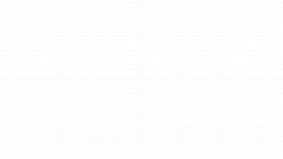

# Scenario 2: Analyzing Population Trends and Forecasts for Winnipeg

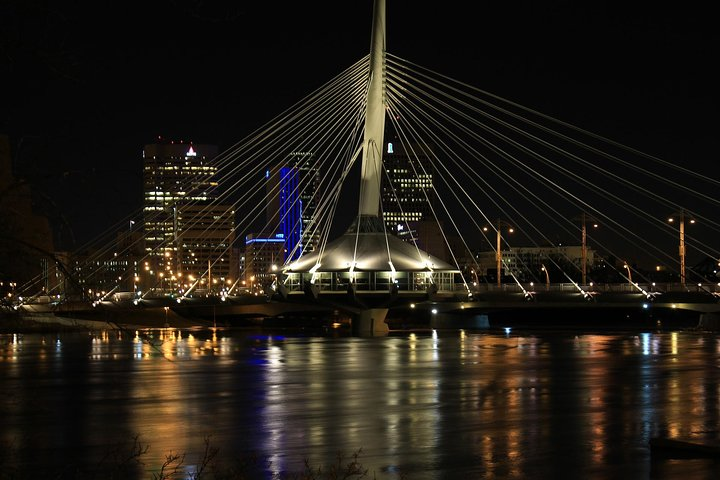



You have just joined the City Planning department of the City of Winnipeg as a data analyst. Your first task is to analyze historical and forecast population levels for the City of Winnipeg and the Winnipeg Census Metropolitan Area (CMA). The dataset you will work with contains historical data from 2017 and forecast data up to 2024. Your analysis will help city planners make informed decisions about urban development and resource allocation.

# Data Overview

The dataset contains 57 rows and 9 columns, with each row representing a specific year. Here are the columns in the dataset:

Year: The year of the data point.

Winnipeg CMA: The actual population of the Winnipeg Census Metropolitan Area.

Winnipeg CMA Forecast - Low: The low-end forecasted population for the Winnipeg CMA.

Winnipeg CMA Forecast - Baseline: The baseline forecasted population for the Winnipeg CMA.

Winnipeg CMA Forecast - High: The high-end forecasted population for the Winnipeg CMA.

City of Winnipeg: The actual population of the City of Winnipeg.

City of Winnipeg Forecast - Low: The low-end forecasted population for the City of Winnipeg.

City of Winnipeg Forecast - Baseline: The baseline forecasted population for the City of Winnipeg.

City of Winnipeg Forecast - High: The high-end forecasted population for the City of Winnipeg.

# Step 1: Import the Dataset

In [24]:
#click on https://data.winnipeg.ca/City-Planning/City-Of-Winnipeg-Population/mhuw-u7yg/about_data
#Save as .csv

In [25]:
import pandas as pd
df=pd.read_csv("C:/Users/miche/Downloads/City_Of_Winnipeg_Population_20250228.csv")

# Step 2 : Explore Dataset

In [27]:
# Check the structure of the DataFrame
print(f'INFO: {df.info()}')

# Display summary statistics for numerical columns
print(f'DESCRIBE: {df.describe()}')

# Print all column names to verify the exact names
print(f'COLUMNS: {df.columns}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  57 non-null     int64  
 1   Winnipeg CMA                          32 non-null     float64
 2   Winnipeg CMA Forecast - Low           25 non-null     float64
 3   Winnipeg CMA Forecast - Baseline      25 non-null     float64
 4   Winnipeg CMA Forecast - High          25 non-null     float64
 5   City of Winnipeg                      32 non-null     float64
 6   City of Winnipeg Forecast - Low       25 non-null     float64
 7   City of Winnipeg Forecast - Baseline  25 non-null     float64
 8   City of Winnipeg Forecast - High      25 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 4.1 KB
INFO: None
DESCRIBE:               Year   Winnipeg CMA  Winnipeg CMA Forecast - Low  \
count    57.000000      

# Step 3: Historical Analysis

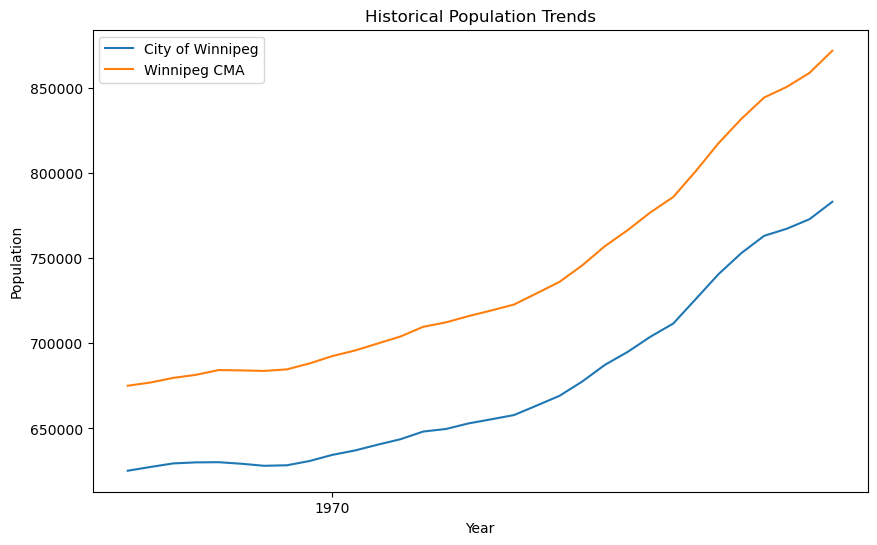

In [29]:
import matplotlib.pyplot as plt

# Convert 'Year' column to datetime type if needed
df['Year'] = pd.to_datetime(df['Year'])


# Filter historical data up to '2023-12-31'
historical_data = df[df['Year'] <= '2023-12-31']



# Plot historical population data
plt.figure(figsize=(10, 6))
plt.plot(historical_data['Year'], historical_data['City of Winnipeg'], label='City of Winnipeg')
plt.plot(historical_data['Year'], historical_data['Winnipeg CMA'], label='Winnipeg CMA')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Historical Population Trends')
plt.legend()
plt.show()


# Please interpret the line chart.

**Explanation:**

This chart shows the Historical Population Trends. It displays two lines, a blue one for the City of Winnipeg (the actual population of the City of Winnipeg - as defined in the Data Overview), and an orange on for the Winnipeg CMA (the actual population of the Winnipeg Census Metropolitan Area - as defined in the Data Overview). 

This chart shows that in the year 1970, the population of the City of Winnipeg was below 650000, and the population of the Winnipeg CMA was approximately 700000. From there, both of these statistics began to grow, reaching a population of about 755000 for the Winnipeg CMA, and above 850000 for the City of Winnipeg.

These lines differ significantly because the Winnipeg CMA is recording the population of just the Metropolitan Area of Winnipeg, while the City of Winnipeg is recording the population of the entire city of Winnipeg (including the Metropolitan Area).